## Independent Project Notebook

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import math
import os
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### Import data

In [ ]:
# Import college data
college_df = pd.read_csv('data/college/' + 'college_09_21.csv')

In [3]:
college_df.head()

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [4]:
# Import draft record
draft_df = pd.read_csv('data/NBA/' + 'draft_history.csv')
draft_df.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


In [5]:
# Import NBA data
nba_df = pd.read_csv('data/NBA/' + 'raptor.csv')
nba_df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Stephen Curry,curryst01,2016,7053,3314,10.532883,1.688492,12.221375,7.781331,3.408263,...,10.379411,2.108447,12.487858,26.666873,23.659318,3.007555,10.635103,2.712822,13.347925,3.306111
1,Stephen Curry,curryst01,2015,7192,3439,8.504968,1.677165,10.182132,7.218913,5.109589,...,8.600890,2.437371,11.038262,25.089873,19.914785,5.175088,8.787715,2.657047,11.444762,3.130309
2,Draymond Green,greendr01,2016,7778,3687,2.645310,4.760084,7.405394,8.459053,6.767176,...,3.934410,5.423060,9.357470,23.470494,17.817424,5.653070,4.266894,5.817697,10.084592,2.247664
3,James Harden,hardeja01,2019,6728,3291,9.959259,1.792524,11.751782,5.379972,-1.766076,...,9.566047,1.149234,10.715281,22.791368,20.057946,2.733422,10.893131,1.676179,12.569309,0.463845
4,Chris Paul,paulch01,2015,6633,3302,7.508889,2.398886,9.907775,11.087445,0.313065,...,8.557501,2.111893,10.669395,22.609142,19.418015,3.191128,8.772725,2.137896,10.910621,-0.393643


### Reorganize data -- NBA

In [6]:
# Get all players drafted after 2013
draft_df = draft_df[draft_df['season'] >= 2014]
draft_df.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
6668,203952,Andrew Wiggins,2014,1,1,1,Draft,1610612739,Cleveland,Cavaliers,CLE,Kansas,College/University,1
6669,203953,Jabari Parker,2014,1,2,2,Draft,1610612749,Milwaukee,Bucks,MIL,Duke,College/University,1
6670,203954,Joel Embiid,2014,1,3,3,Draft,1610612755,Philadelphia,76ers,PHI,Kansas,College/University,1
6671,203932,Aaron Gordon,2014,1,4,4,Draft,1610612753,Orlando,Magic,ORL,Arizona,College/University,1
6672,203957,Dante Exum,2014,1,5,5,Draft,1610612762,Utah,Jazz,UTA,Australian Institute of Sport (Australia),Other Team/Club,1


In [7]:
# Make new data frame that has all the players in both college and nba datasets.
players_df = nba_df[nba_df['player_name'].isin(college_df['player_name'])]

In [8]:
# Filter data frame so that we only have players who are drafted after 2013.
players_df = players_df[players_df['player_name'].isin(draft_df['player_name'])]

In [9]:
# Check pro players drafted after 2013 -- modern stats for each season
players_df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
50,Joel Embiid,embiijo01,2019,5350,2488,2.324392,4.547778,6.872169,3.508452,4.850849,...,2.686679,4.840821,7.527499,13.306101,9.917043,3.389058,3.351387,3.800825,7.152212,0.625010
66,Jayson Tatum,tatumja01,2020,6145,2955,3.513894,1.271051,4.784945,2.071568,5.047583,...,3.404007,2.104405,5.508413,12.549583,9.158699,3.390884,4.096688,1.938681,6.035370,-0.156786
89,Joel Embiid,embiijo01,2021,4084,1942,3.349051,4.755188,8.104239,4.672204,2.971694,...,3.772898,4.586048,8.358945,11.187209,8.858339,2.328871,3.260138,4.336760,7.596898,0.999581
113,Karl-Anthony Towns,townska01,2018,6182,3088,2.896646,-0.231058,2.665588,8.035778,-0.309596,...,4.071891,-0.234719,3.837173,10.294218,10.333602,-0.039384,4.280248,0.469437,4.749685,-0.657553
142,Pascal Siakam,siakapa01,2019,7149,3439,0.897083,0.730981,1.628063,2.818115,3.227452,...,1.305769,1.249780,2.555549,9.320982,7.303222,2.017760,1.429030,1.501101,2.930131,-0.355705


In [10]:
pro_df = players_df.drop(['season','poss'],axis=1)

In [11]:
# Group
pro_df = pro_df.groupby(['player_id','player_name'],as_index = False).agg(np.mean)

In [12]:
# Modern stats for all players drafted to NBA after 2013.
# All stats averaged across seasons. 
pro_df.columns

Index(['player_id', 'player_name', 'mp', 'raptor_box_offense',
       'raptor_box_defense', 'raptor_box_total', 'raptor_onoff_offense',
       'raptor_onoff_defense', 'raptor_onoff_total', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'war_playoffs', 'predator_offense', 'predator_defense',
       'predator_total', 'pace_impact'],
      dtype='object')

In [13]:
# Get average games played per season
pro_df['av_games_ps'] = pro_df['mp']/48
# Subset to relevant columns
pro_df = pro_df[['player_id','player_name','raptor_offense','raptor_defense','war_total']]
# Check        
pro_df.head()

,player_id,player_name,raptor_offense,raptor_defense,war_total
0,achiupr01,Precious Achiuwa,-4.347596,0.954821,-0.246055
1,adamsjo01,Jordan Adams,-2.819293,0.967886,0.343451
2,alexani01,Nickeil Alexander-Walker,-1.425612,-0.509075,0.471103
3,allengr01,Grayson Allen,-1.624902,-2.337975,0.211977
4,allenja01,Jarrett Allen,-1.267369,-0.023091,1.439450


In [14]:
# Scale
pro_stats = pro_df.drop(columns = ['player_id','player_name'])

# Operations
mean = pro_stats.mean(axis=0)
pro_stats -= mean
std = pro_stats.std(axis=0)
pro_stats /= std

# Rejoin college_df
pro_df = pd.concat([pro_df[['player_id','player_name']],pro_stats], axis = 1)

In [15]:
# Make player_id column into string column
pro_df['player_id'] = pro_df['player_id'].astype(str)

# Filter the pro df  players who were drafted from college to NBA after 2013
pro_df = pro_df[pro_df['player_name'].isin(college_df['player_name'])]

# Check
pro_df.head(10)

,player_id,player_name,raptor_offense,raptor_defense,war_total
0,achiupr01,Precious Achiuwa,-0.868631,0.539676,-0.631396
1,adamsjo01,Jordan Adams,-0.313494,0.543459,-0.261756
2,alexani01,Nickeil Alexander-Walker,0.192744,0.115793,-0.181715
3,allengr01,Grayson Allen,0.120354,-0.413780,-0.344195
4,allenja01,Jarrett Allen,0.250224,0.256513,0.425470
5,allenka01,Kadeem Allen,0.295476,0.256634,-0.293697
6,anderju01,Justin Anderson,0.121669,0.260815,-0.275771
7,anderky01,Kyle Anderson,0.185858,0.661893,1.169810
8,anigbik01,Ike Anigbogu,-3.413702,-5.980354,-0.576506
9,antetko01,Kostas Antetokounmpo,-1.994156,2.812279,-0.469236


### Reorganize data -- college

In [16]:
# Filter to college players drafed to NBA after 2013
college_df = college_df[college_df['player_name'].isin(pro_df['player_name'])]
college_df.head(10)

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.000000
685,Anthony Brown,Oklahoma St.,B12,33,30.7,107.4,10.7,50.8,53.23,7.4,...,1.490050,0.8485,1.2121,2.0606,0.2727,0.2727,0.3939,2.3939,NaN,0.000000
959,Cameron Johnson,Texas St.,Slnd,26,49.1,95.7,24.9,47.1,49.91,11.7,...,-0.867274,2.2692,3.0769,5.3462,0.6538,0.6923,0.6538,9.3462,NaN,0.000000
1847,Marcus Thornton,LSU,SEC,35,79.1,119.4,28.9,54.4,58.01,7.1,...,1.395830,2.0286,3.4571,5.4857,2.1429,1.6000,0.3714,21.1143,NaN,10.568900
3569,Justin Jackson,Tennessee,SEC,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.290680,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.000000
3773,Josh Jackson,South Carolina St.,MEAC,26,43.8,91.5,26.1,51.9,53.52,10.2,...,-1.468040,1.5769,3.2308,4.8077,0.9615,0.2308,0.3462,8.0385,NaN,0.000000
5159,Cameron Johnson,Texas St.,Slnd,26,61.1,93.4,29.9,45.3,49.97,10.5,...,-0.356198,2.7308,5.2692,8.0000,1.1538,1.5385,0.4615,14.8462,PF/C,0.153524
8409,Anthony Brown,Washington St.,P10,4,0.5,59.7,8.7,0.0,0.00,20.1,...,-5.352120,0.2500,0.2500,0.5000,0.0000,0.0000,0.0000,0.0000,PF/C,0.000000
8958,Lamar Patterson,Pittsburgh,BE,11,7.6,84.3,16.3,35.4,39.35,4.6,...,2.070610,0.3636,0.7273,1.0909,0.3636,0.2727,0.4545,2.0909,Wing G,6.568080
9056,Cory Jefferson,Baylor,B12,20,5.9,94.8,16.3,41.2,47.00,13.6,...,-0.843745,0.4500,0.5000,0.9500,0.0000,0.0500,0.1500,1.0000,C,0.714349


In [17]:
# Subset to relevant columns
college_df = college_df[['player_name','GP','Min_per','Ortg','usg','eFG','TS_per','ORB_per','DRB_per','AST_per',
                         'TO_per','FT_per','twoP_per','TP_per','stops','porpag','adjoe','blk_per','ast/tov',
                         'stl_per','adrtg','dporpag','obpm','dbpm', 'pick']]

In [18]:
# Group by player
mean_cols = college_df.drop(columns = ['player_name']).columns
gr_dict = {col: 'mean' for col in mean_cols}
college_df = college_df.groupby(['player_name'],as_index = False).agg(gr_dict)
        
# Make pick column negative so that low picks are valued higher in scaling phase
college_df['pick'] = -college_df['pick']

# Adjust stops column
college_df['stops'] = (college_df['stops']/(college_df['GP']*college_df['Min_per'])).round(2)
college_df = college_df.rename(columns={'stops': 'stops_adj'})

# Add adj_PORPAG and adj_DPORPAG columns (usg*X)
college_df['adj_PORPAG'] = college_df['usg']*college_df['porpag']
college_df['adj_DPORPAG'] = college_df['usg']*college_df['dporpag']

In [19]:
# Scale
college_stats = college_df.drop(columns = ['player_name'])

# Operations
mean = college_stats.mean(axis=0)
college_stats -= mean
std = college_stats.std(axis=0)
college_stats /= std

# Rejoin college_df
college_df = pd.concat([college_df[['player_name']],college_stats], axis = 1)

# Add player id column to the start
college_df.insert(0, 'player_id', value = '')
for i in range(0, len(college_df)):
    name = college_df.loc[i,'player_name']
    ind = pro_df.index[pro_df['player_name'] == name][0]
    college_df.loc[i,'player_id'] = pro_df.loc[ind,'player_id']

In [20]:
college_df.head(10)

,player_id,player_name,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,blk_per,ast/tov,stl_per,adrtg,dporpag,obpm,dbpm,pick,adj_PORPAG,adj_DPORPAG
0,gordoaa01,Aaron Gordon,1.125553,0.761066,-0.575066,0.063514,-0.304815,-1.342360,0.944002,0.679584,...,0.079651,0.325053,-0.297497,-1.751758,2.341450,-0.126897,1.427664,1.447113,-0.259165,1.667584
1,holidaa01,Aaron Holiday,0.287546,0.865068,-0.420670,0.171041,-0.058184,0.106144,-1.163201,-1.360117,...,-0.858478,0.654602,0.207023,1.518835,-0.546469,-0.128921,-1.151831,0.341128,-0.053946,-0.319128
2,nesmiaa01,Aaron Nesmith,-1.775241,-0.642967,0.496057,-0.326271,0.752178,0.891295,-0.763559,-0.030155,...,-0.285177,-0.678947,-0.234432,1.629455,-0.734524,0.204411,-0.995603,0.865016,0.174340,-0.698642
3,naderab01,Abdel Nader,-0.614924,-0.706343,-2.526247,1.199267,-1.590824,-1.826456,-0.472910,0.247986,...,-0.024585,-1.031457,0.017828,1.033103,-1.503758,-2.289293,-0.891274,-1.696211,-1.312317,-0.592256
4,schofad01,Admiral Schofield,0.110275,-0.438212,-0.106088,-0.238905,-0.163883,-0.262691,-0.145930,0.363079,...,-0.563141,-0.284829,-0.770485,0.435374,-0.710463,-0.143242,-0.698931,-0.764856,-0.522169,-0.639545
5,paynead01,Adreian Payne,0.352008,-1.192229,-0.331892,-0.400195,0.263319,0.273014,0.835009,0.919361,...,1.182822,-1.155154,-0.392095,-1.350410,-0.725088,-0.887276,0.768195,0.806806,-0.691349,-0.728776
6,peteral01,Alec Peters,-0.179805,0.840693,1.077937,0.325611,0.633266,0.951162,0.162884,0.574082,...,-0.780301,-0.558074,-0.833550,0.750658,0.274953,0.472473,-0.983690,-1.463372,0.821375,0.365256
7,johnsal02,Alize Johnson,-0.034765,0.731815,0.056028,1.165665,-0.348857,-0.324623,1.367865,2.760846,...,-0.719496,-0.158729,-1.306538,1.296344,-0.402734,0.338732,-1.097731,-1.230533,0.791279,0.310187
8,harrian01,Andrew Harrison,1.415632,0.351556,-0.389791,-0.312830,-1.793415,-1.012060,-1.005766,-1.468815,...,-0.823733,1.020999,-0.360562,-0.329735,0.320943,-0.020619,-0.598500,-0.881275,-0.459078,0.009165
9,wiggian01,Andrew Wiggins,0.545394,1.040572,0.212354,0.574267,-0.604297,-0.089284,0.459588,-0.663166,...,-0.024585,-0.735899,0.080893,0.283319,0.875373,0.679828,-0.044719,1.621742,0.904300,0.975120


### Add dummy variables to both data sets: 1 for top 10% defensive or top 10% offensive player, 0 for not.


In [21]:
# Add in columns
pro_df['top_d'] = 0
pro_df['top_o'] = 0
pro_df['top_war'] = 0

college_df['top_d'] = 0
college_df['top_o'] = 0

# Check
pro_df.head()

,player_id,player_name,raptor_offense,raptor_defense,war_total,top_d,top_o,top_war
0,achiupr01,Precious Achiuwa,-0.868631,0.539676,-0.631396,0,0,0
1,adamsjo01,Jordan Adams,-0.313494,0.543459,-0.261756,0,0,0
2,alexani01,Nickeil Alexander-Walker,0.192744,0.115793,-0.181715,0,0,0
3,allengr01,Grayson Allen,0.120354,-0.413780,-0.344195,0,0,0
4,allenja01,Jarrett Allen,0.250224,0.256513,0.425470,0,0,0


### Display top NBA

In [22]:
print("Top 10% of defensive players drafted after 2013: ")
# Fill columns
for i in range(0,len(pro_df)):
    # Get value
    defen = pro_df['raptor_defense'][i]
    
    # Conditional
    if(defen >= np.percentile(pro_df['raptor_defense'], 90)):
        pro_df.loc[i,'top_d'] = 1
        print(pro_df['player_name'][i])

print(" ")
print("Top 10% of offensive players drafted after 2013: ")
# Fill columns
for i in range(0,len(pro_df)):
    # Get values
    off = pro_df['raptor_offense'][i]
    
    # Conditional
    if(off >= np.percentile(pro_df['raptor_offense'], 90)):
        pro_df.loc[i,'top_o'] = 1
        print(pro_df['player_name'][i])

print(" ")
print("Top 10% of players in terms of WAR, drafted after 2013: ")
# Fill columns
for i in range(0,len(pro_df)):
    # Get values
    off = pro_df['war_total'][i]
    
    # Conditional
    if(off >= np.percentile(pro_df['war_total'], 90)):
        pro_df.loc[i,'top_war'] = 1
        print(pro_df['player_name'][i])
 

Top 10% of defensive players drafted after 2013: 
Kostas Antetokounmpo
Bruce Brown
Vernon Carey Jr.
Donte DiVincenzo
Henry Ellenson
Joel Embiid
Rondae Hollis-Jefferson
Josh Huestis
Jonathan Isaac
Cory Jefferson
Isaiah Joe
Brice Johnson
Dakari Johnson
Romeo Langford
Cody Martin
De'Anthony Melton
Larry Nance Jr.
Chuma Okeke
Jakob Poeltl
Marcus Smart
Isaiah Stewart
Jarnell Stokes
Tyrell Terry
Matisse Thybulle
Myles Turner
Tyler Ulis
Jarred Vanderbilt
Thomas Welsh
Derrick White
Delon Wright
 
Top 10% of offensive players drafted after 2013: 
Devin Booker
Malcolm Brogdon
Anthony Brown
Jalen Brunson
Rakeem Christmas
Jordan Clarkson
John Collins
Joel Embiid
De'Aaron Fox
Shai Gilgeous-Alexander
Devonte' Graham
Tyrese Haliburton
Jalen Harris
Buddy Hield
Luke Kennard
Skylar Mays
Donovan Mitchell
Ja Morant
Monte Morris
Jamal Murray
Michael Porter Jr.
Immanuel Quickley
Grant Riller
Jarnell Stokes
Jayson Tatum
Karl-Anthony Towns
Derrick White
Zion Williamson
Robert Woodard II
Trae Young
 
Top 10% o

### Display top college

In [23]:
print("Top 10% of defensive college players drafted after 2013: ")
# Fill columns
for i in range(0,len(college_df)):
    # Get value
    defen = college_df['adj_DPORPAG'][i]
    
    # Conditional
    if(defen >= np.percentile(college_df['adj_DPORPAG'], 90)):
        college_df.loc[i,'top_d'] = 1
        print(college_df['player_name'][i])

print(" ")
print("Top 10% of offensive college players drafted after 2013: ")
# Fill columns
for i in range(0,len(pro_df)):
    # Get values
    off = college_df['adj_PORPAG'][i]
    
    # Conditional
    if(off >= np.percentile(college_df['adj_PORPAG'], 90)):
        college_df.loc[i,'top_o'] = 1
        print(college_df['player_name'][i])

Top 10% of defensive college players drafted after 2013: 
Aaron Gordon
Ben Simmons
Bol Bol
Caleb Swanigan
Cole Anthony
Collin Sexton
D'Angelo Russell
Daniel Hamilton
De'Aaron Fox
DeAndre' Bembry
Deandre Ayton
Delon Wright
Ignas Brazdeikis
Isaiah Whitehead
Ja Morant
Jabari Parker
Jahlil Okafor
Jarrett Culver
Jaylen Brown
Jayson Tatum
Josh Okogie
Julius Randle
Marcus Smart
Marvin Bagley III
Miles Bridges
Precious Achiuwa
Stanley Johnson
Trae Young
Vernon Carey Jr.
Zion Williamson
 
Top 10% of offensive college players drafted after 2013: 
Ben Simmons
Bol Bol
Cameron Payne
Carsen Edwards
Cassius Winston
Collin Sexton
D'Angelo Russell
Deandre Ayton
Delon Wright
Derrick White
Doug McDermott
Grant Riller
Isaiah Stewart
Ja Morant
Jabari Parker
Jahlil Okafor
Jamal Murray
James Wiseman
Jawun Evans
Jerian Grant
Lauri Markkanen
Malik Monk
Marcus Smart
Markelle Fultz
Marvin Bagley III
Monte Morris
T.J. Warren
Trae Young
Vernon Carey Jr.
Zion Williamson


In [24]:
# Check dummy variable columns
college_df[['player_id','player_name','adj_DPORPAG','adj_PORPAG','top_d','top_o']]

,player_id,player_name,adj_DPORPAG,adj_PORPAG,top_d,top_o
0,gordoaa01,Aaron Gordon,1.667584,-0.259165,1,0
1,holidaa01,Aaron Holiday,-0.319128,-0.053946,0,0
2,nesmiaa01,Aaron Nesmith,-0.698642,0.174340,0,0
3,naderab01,Abdel Nader,-0.592256,-1.312317,0,0
4,schofad01,Admiral Schofield,-0.639545,-0.522169,0,0
...,...,...,...,...,...,...
291,colliza01,Zach Collins,-0.078246,-0.339010,0,0
292,lavinza01,Zach LaVine,-1.327851,-1.182476,0,0
293,nnajize01,Zeke Nnaji,1.044681,0.848894,0,0
294,smithzh01,Zhaire Smith,-0.197045,-0.094319,0,0


In [25]:
# Check pro data frame
pro_df.head(15)

,player_id,player_name,raptor_offense,raptor_defense,war_total,top_d,top_o,top_war
0,achiupr01,Precious Achiuwa,-0.868631,0.539676,-0.631396,0,0,0
1,adamsjo01,Jordan Adams,-0.313494,0.543459,-0.261756,0,0,0
2,alexani01,Nickeil Alexander-Walker,0.192744,0.115793,-0.181715,0,0,0
3,allengr01,Grayson Allen,0.120354,-0.413780,-0.344195,0,0,0
4,allenja01,Jarrett Allen,0.250224,0.256513,0.425470,0,0,0
5,allenka01,Kadeem Allen,0.295476,0.256634,-0.293697,0,0,0
6,anderju01,Justin Anderson,0.121669,0.260815,-0.275771,0,0,0
7,anderky01,Kyle Anderson,0.185858,0.661893,1.169810,0,0,0
8,anigbik01,Ike Anigbogu,-3.413702,-5.980354,-0.576506,0,0,0
9,antetko01,Kostas Antetokounmpo,-1.994156,2.812279,-0.469236,1,0,0


In [26]:
# Check college data frame
college_df.head(10)

,player_id,player_name,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,stl_per,adrtg,dporpag,obpm,dbpm,pick,adj_PORPAG,adj_DPORPAG,top_d,top_o
0,gordoaa01,Aaron Gordon,1.125553,0.761066,-0.575066,0.063514,-0.304815,-1.342360,0.944002,0.679584,...,-0.297497,-1.751758,2.341450,-0.126897,1.427664,1.447113,-0.259165,1.667584,1,0
1,holidaa01,Aaron Holiday,0.287546,0.865068,-0.420670,0.171041,-0.058184,0.106144,-1.163201,-1.360117,...,0.207023,1.518835,-0.546469,-0.128921,-1.151831,0.341128,-0.053946,-0.319128,0,0
2,nesmiaa01,Aaron Nesmith,-1.775241,-0.642967,0.496057,-0.326271,0.752178,0.891295,-0.763559,-0.030155,...,-0.234432,1.629455,-0.734524,0.204411,-0.995603,0.865016,0.174340,-0.698642,0,0
3,naderab01,Abdel Nader,-0.614924,-0.706343,-2.526247,1.199267,-1.590824,-1.826456,-0.472910,0.247986,...,0.017828,1.033103,-1.503758,-2.289293,-0.891274,-1.696211,-1.312317,-0.592256,0,0
4,schofad01,Admiral Schofield,0.110275,-0.438212,-0.106088,-0.238905,-0.163883,-0.262691,-0.145930,0.363079,...,-0.770485,0.435374,-0.710463,-0.143242,-0.698931,-0.764856,-0.522169,-0.639545,0,0
5,paynead01,Adreian Payne,0.352008,-1.192229,-0.331892,-0.400195,0.263319,0.273014,0.835009,0.919361,...,-0.392095,-1.350410,-0.725088,-0.887276,0.768195,0.806806,-0.691349,-0.728776,0,0
6,peteral01,Alec Peters,-0.179805,0.840693,1.077937,0.325611,0.633266,0.951162,0.162884,0.574082,...,-0.833550,0.750658,0.274953,0.472473,-0.983690,-1.463372,0.821375,0.365256,0,0
7,johnsal02,Alize Johnson,-0.034765,0.731815,0.056028,1.165665,-0.348857,-0.324623,1.367865,2.760846,...,-1.306538,1.296344,-0.402734,0.338732,-1.097731,-1.230533,0.791279,0.310187,0,0
8,harrian01,Andrew Harrison,1.415632,0.351556,-0.389791,-0.312830,-1.793415,-1.012060,-1.005766,-1.468815,...,-0.360562,-0.329735,0.320943,-0.020619,-0.598500,-0.881275,-0.459078,0.009165,0,0
9,wiggian01,Andrew Wiggins,0.545394,1.040572,0.212354,0.574267,-0.604297,-0.089284,0.459588,-0.663166,...,0.080893,0.283319,0.875373,0.679828,-0.044719,1.621742,0.904300,0.975120,0,0


In [27]:
combine_df = pd.merge(college_df, pro_df, on = 'player_id')
combine_war_df = combine_df.copy()
combine_war_df['war_y'] = 0


### Display all top WAR players

In [28]:
for i in range(0,len(combine_war_df)):
    if(combine_war_df.loc[i,'top_war'] == 1):
        print(combine_war_df.loc[i,'player_name_x'])

Aaron Gordon
Ben Simmons
Buddy Hield
Deandre Ayton
Delon Wright
Derrick White
Devin Booker
Devonte' Graham
Donovan Mitchell
Donte DiVincenzo
Isaiah Stewart
Jakob Poeltl
Jamal Murray
Jaylen Brown
Jayson Tatum
Joel Embiid
John Collins
Josh Richardson
Karl-Anthony Towns
Larry Nance Jr.
Malcolm Brogdon
Marcus Smart
Matisse Thybulle
Michael Porter Jr.
Mikal Bridges
Montrezl Harrell
Pascal Siakam
Shai Gilgeous-Alexander
Trae Young
Zion Williamson


### Display players who are top pro WAR but not top college dporpag and not top college college porgpag 

In [29]:
for i in range(0,len(combine_war_df)):
    if ((combine_war_df.loc[i,'top_war'] == 1) & (combine_war_df.loc[i,'top_o_x'] != 1) &
                                               (combine_war_df.loc[i,'top_d_x'] != 1)):
        combine_war_df.loc[i,'war_y'] = 1
        print(combine_war_df.loc[i,'player_name_x'])

Buddy Hield
Devin Booker
Devonte' Graham
Donovan Mitchell
Donte DiVincenzo
Jakob Poeltl
Joel Embiid
John Collins
Josh Richardson
Karl-Anthony Towns
Larry Nance Jr.
Malcolm Brogdon
Matisse Thybulle
Michael Porter Jr.
Mikal Bridges
Montrezl Harrell
Pascal Siakam
Shai Gilgeous-Alexander


In [30]:
# drop columns
combine_war_df.drop(['player_id', 'player_name_x', 'GP', 'Min_per',
                 'top_d_x','top_o_x','player_name_y','top_d_y',
                 'top_o_y','top_war', 'raptor_offense', 'raptor_defense',
                 'war_total','adj_PORPAG', 'adj_DPORPAG',
                'porpag','dporpag'], axis = 1, inplace = True)

In [31]:
# Drop NA
combine_war_df.dropna(inplace = True)

### Train random forest and show feature significance

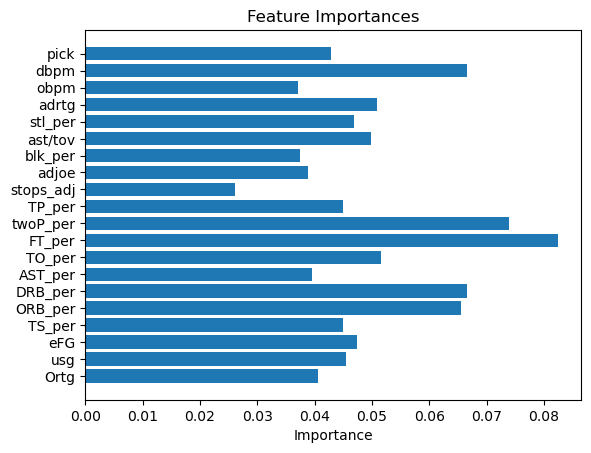

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier on the entire dataset
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
X = combine_war_df.drop('war_y',axis=1)
y = combine_war_df['war_y']
rf.fit(X,y)

# Get feature importances
importances = rf.feature_importances_

# Plot feature importances as a bar chart
fig, ax = plt.subplots()
ax.barh(range(X.shape[1]), importances)
ax.set_xlabel('Importance')
ax.set_yticks(range(X.shape[1]))
ax.set_yticklabels(X.columns)
ax.set_title('Feature Importances')
plt.show()